# Recommending adequate crop on the basis of the soil conditions

### Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the dataset

In [2]:
data = pd.read_csv(r'Crop_recommendation.csv')

### Displaying the first five and the last five entries

In [3]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
data.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
1895,22,8,33,28.435729,95.884041,5.665785,203.928371,coconut
1896,28,27,32,28.940997,93.001090,5.764615,191.772309,coconut
1897,23,21,26,26.454887,93.450426,5.901496,149.222026,coconut
1898,37,5,34,25.794905,93.841506,5.779033,152.423871,coconut
1899,19,26,29,26.931419,98.803136,5.671549,166.571288,coconut


### Some basis analysis

In [5]:
data.shape

(1900, 8)

In [6]:
data.describe

<bound method NDFrame.describe of        N   P   K  temperature   humidity        ph    rainfall    label
0     90  42  43    20.879744  82.002744  6.502985  202.935536     rice
1     85  58  41    21.770462  80.319644  7.038096  226.655537     rice
2     60  55  44    23.004459  82.320763  7.840207  263.964248     rice
3     74  35  40    26.491096  80.158363  6.980401  242.864034     rice
4     78  42  42    20.130175  81.604873  7.628473  262.717340     rice
...   ..  ..  ..          ...        ...       ...         ...      ...
1895  22   8  33    28.435729  95.884041  5.665785  203.928371  coconut
1896  28  27  32    28.940997  93.001090  5.764615  191.772309  coconut
1897  23  21  26    26.454887  93.450426  5.901496  149.222026  coconut
1898  37   5  34    25.794905  93.841506  5.779033  152.423871  coconut
1899  19  26  29    26.931419  98.803136  5.671549  166.571288  coconut

[1900 rows x 8 columns]>

In [13]:
#looking for missing values
data.isna().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1900 entries, 0 to 1899
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            1900 non-null   int64  
 1   P            1900 non-null   int64  
 2   K            1900 non-null   int64  
 3   temperature  1900 non-null   float64
 4   humidity     1900 non-null   float64
 5   ph           1900 non-null   float64
 6   rainfall     1900 non-null   float64
 7   label        1900 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 118.9+ KB


In [8]:
data.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

### Assigning the features and the target column

In [10]:
x=data.drop(['label'],axis=1)
y=pd.DataFrame(data['label'])

In [12]:
#Finding out the number of occurences of each unique value
y['label'].value_counts()

mungbean       100
lentil         100
orange         100
papaya         100
chickpea       100
coconut        100
watermelon     100
mothbeans      100
apple          100
kidneybeans    100
maize          100
grapes         100
blackgram      100
banana         100
muskmelon      100
pomegranate    100
mango          100
rice           100
pigeonpeas     100
Name: label, dtype: int64

### Pre-processing

In [16]:
from sklearn.preprocessing import LabelEncoder
label_en=LabelEncoder()
a=['label']
for i in np.arange (len(a)):
    y[a[i]]=label_en.fit_transform(y[a[i]])

In [19]:
y

,label
0,17
1,17
2,17
3,17
4,17
...,...
1895,4
1896,4
1897,4
1898,4


### Correlation heatmap to find out highly correlated variables

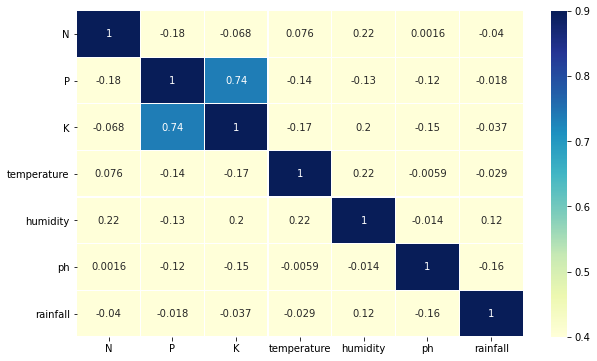

In [23]:
corrmatrix=data.corr()
plt.subplots(figsize=(10,6))
sns.heatmap(corrmatrix,vmin=0.4,vmax=0.9,annot=True,linewidth=0.2,cmap='YlGnBu')

#'K' and 'P' are highly correlated with each other and hence one of these two can be dropped

In [30]:
x=x.drop(['P'],axis=1)

In [31]:
x

,N,K,temperature,humidity,ph,rainfall
0,90,43,20.879744,82.002744,6.502985,202.935536
1,85,41,21.770462,80.319644,7.038096,226.655537
2,60,44,23.004459,82.320763,7.840207,263.964248
3,74,40,26.491096,80.158363,6.980401,242.864034
4,78,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...
1895,22,33,28.435729,95.884041,5.665785,203.928371
1896,28,32,28.940997,93.001090,5.764615,191.772309
1897,23,26,26.454887,93.450426,5.901496,149.222026
1898,37,34,25.794905,93.841506,5.779033,152.423871


### Splitting the dataset into train and test for analysis

In [32]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(x,y, random_state=42, test_size=0.3)


In [34]:
x_train.shape

(1330, 6)

In [35]:
x_test.shape

(570, 6)

In [36]:
y_train.shape

(1330, 1)

In [37]:
y_test.shape

(570, 1)

### Standardising the variables to bring them around a standard scale

In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

## Model Building

### 1. KNN Classifier

In [54]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, recall_score, f1_score , accuracy_score, precision_score, classification_report

In [55]:
acc_values = []
neighbors = np.arange(3,15)
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k, metric= 'minkowski')
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    acc = accuracy_score(y_test,y_pred)
    acc_values.append(acc)

<ipython-input-55-383ce2f39b3b>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  classifier.fit(x_train, y_train)
<ipython-input-55-383ce2f39b3b>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  classifier.fit(x_train, y_train)
<ipython-input-55-383ce2f39b3b>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  classifier.fit(x_train, y_train)
<ipython-input-55-383ce2f39b3b>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  classifier.fit(x_train, y_train)
<ipython-input-55-383ce2f39b3b>:5: DataConversionWarning: A column-vector y was passed when a 1d

Text(0, 0.5, 'Accuracy')

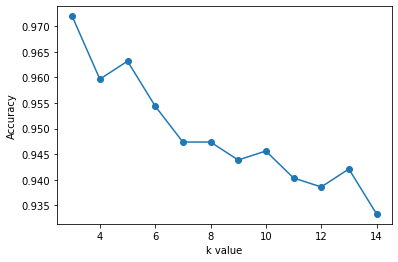

In [50]:
plt.plot(neighbors, acc_values, 'o-')
plt.xlabel('k value')
plt.ylabel('Accuracy')

In [51]:
classifier = KNeighborsClassifier(n_neighbors=3, metric= 'minkowski')
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

<ipython-input-51-877cf89d6268>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  classifier.fit(x_train, y_train)


In [57]:
print('Accuracy is:', accuracy_score(y_test,y_pred))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))
print(classification_report(y_test, y_pred))

Accuracy is: 0.9333333333333333
Weighted F1-score: 0.93
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        24
           1       0.89      1.00      0.94        24
           2       0.94      1.00      0.97        31
           3       1.00      1.00      1.00        30
           4       0.97      1.00      0.99        33
           5       1.00      0.97      0.99        36
           6       0.91      1.00      0.96        32
           7       0.89      1.00      0.94        24
           8       1.00      0.89      0.94        28
           9       0.65      1.00      0.79        24
          10       1.00      0.78      0.88        36
          11       0.96      1.00      0.98        24
          12       1.00      1.00      1.00        34
          13       1.00      0.77      0.87        35
          14       0.96      0.86      0.91        29
          15       1.00      0.60      0.75        35
          16       0.80  

## 2. Decision Tree Classifier

In [59]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()
dt_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [60]:
y_pred=dt_model.predict(x_test)

In [61]:
print('Accuracy is:', accuracy_score(y_test,y_pred))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))
print(classification_report(y_test, y_pred))

Accuracy is: 0.9736842105263158
Weighted F1-score: 0.97
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       0.96      1.00      0.98        24
           2       0.94      1.00      0.97        31
           3       1.00      1.00      1.00        30
           4       1.00      0.97      0.98        33
           5       1.00      1.00      1.00        36
           6       1.00      1.00      1.00        32
           7       0.92      0.96      0.94        24
           8       1.00      1.00      1.00        28
           9       0.91      0.83      0.87        24
          10       0.97      0.89      0.93        36
          11       1.00      1.00      1.00        24
          12       1.00      1.00      1.00        34
          13       0.97      1.00      0.99        35
          14       0.93      0.97      0.95        29
          15       0.89      0.94      0.92        35
          16       1.00  

## 3. Support Vector Machine

In [62]:
from sklearn.svm import SVC
svm_linear=SVC(kernel='linear')
svm_linear.fit(x_train,y_train)

C:\Users\Nehla Shajahan\New folder\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVC(kernel='linear')

In [63]:
y_pred=svm_linear.predict(x_test)

In [64]:
print('Accuracy is:', accuracy_score(y_test,y_pred))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))
print(classification_report(y_test, y_pred))

Accuracy is: 0.9596491228070175
Weighted F1-score: 0.96
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       1.00      1.00      1.00        24
           2       0.86      1.00      0.93        31
           3       1.00      1.00      1.00        30
           4       1.00      1.00      1.00        33
           5       1.00      1.00      1.00        36
           6       0.97      1.00      0.98        32
           7       0.76      0.92      0.83        24
           8       1.00      1.00      1.00        28
           9       0.80      1.00      0.89        24
          10       0.92      0.64      0.75        36
          11       1.00      1.00      1.00        24
          12       1.00      1.00      1.00        34
          13       1.00      1.00      1.00        35
          14       1.00      0.93      0.96        29
          15       1.00      0.83      0.91        35
          16       1.00  

## 4. Random Forest Classifier

In [65]:
from sklearn.ensemble import RandomForestClassifier

In [66]:
rf = RandomForestClassifier(n_estimators=20, random_state=0)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)

<ipython-input-66-7609e9b8b7a4>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train, y_train)


In [67]:
print('Accuracy is:', accuracy_score(y_test,y_pred))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))
print(classification_report(y_test, y_pred))

Accuracy is: 0.987719298245614
Weighted F1-score: 0.99
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       1.00      1.00      1.00        24
           2       0.97      1.00      0.98        31
           3       1.00      1.00      1.00        30
           4       1.00      1.00      1.00        33
           5       1.00      1.00      1.00        36
           6       1.00      1.00      1.00        32
           7       0.92      1.00      0.96        24
           8       1.00      1.00      1.00        28
           9       1.00      0.83      0.91        24
          10       1.00      0.92      0.96        36
          11       1.00      1.00      1.00        24
          12       1.00      1.00      1.00        34
          13       1.00      1.00      1.00        35
          14       1.00      1.00      1.00        29
          15       0.90      1.00      0.95        35
          16       1.00   